In [1]:
import zipfile
import os

zip_path = "data_projet.zip"  # chemin vers ton fichier zip
extract_dir = "data_projet"   # dossier où tu veux extraire

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"✅ Fichiers extraits dans {extract_dir}")

✅ Fichiers extraits dans data_projet


In [2]:
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score

# === 1. Dossier contenant les fichiers ===
data_dir = "data_projet/data_projet"  # <-- structure réelle

# === 2. Liste des fichiers de variables ===
var_files = [
    "acce_x.txt", "acce_y.txt", "acce_z.txt",
    "accm_x.txt", "accm_y.txt", "accm_z.txt",
    "vit_x.txt", "vit_y.txt", "vit_z.txt"
]

# === 3. Lecture et empilement des données ===
data_list = []
for f in var_files:
    path = os.path.join(data_dir, f)
    if not os.path.exists(path):
        raise FileNotFoundError(f"Fichier introuvable : {path}")
    data = np.loadtxt(path)
    data_list.append(data)

# Concaténation horizontale
X = np.hstack(data_list)
print("✅ Shape finale de X :", X.shape)  # Doit donner (347, 1152)

# === 4. Lecture du fichier des classes ===
lab_path = os.path.join(data_dir, "lab.txt")
y_true = np.loadtxt(lab_path, dtype=int)

# === 5. Standardisation ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 6. K-Means ===
kmeans = KMeans(n_clusters=6, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)
print("\n📊 KMeans :")
print("Silhouette =", silhouette_score(X_scaled, labels_kmeans))
print("ARI =", adjusted_rand_score(y_true, labels_kmeans))

# === 7. DBSCAN ===
dbscan = DBSCAN(eps=2.0, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
print("\n📊 DBSCAN :")
print("Clusters trouvés =", n_clusters)
print("ARI =", adjusted_rand_score(y_true, labels_dbscan))




✅ Shape finale de X : (347, 1152)

📊 KMeans :
Silhouette = 0.08803888288700057
ARI = 0.40523751061022323

📊 DBSCAN :
Clusters trouvés = 8
ARI = 0.14796624770031877


In [3]:
!pip install tslearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.7/372.7 kB 12.0 MB/s eta 0:00:00



📊 K-Shape Clustering :
ARI = 0.6469927215062679
Exemple de 10 labels prédits : [4 4 4 4 4 4 4 4 4 4]

Tableau Cluster / Vrai_Label :
   Cluster  Vrai_Label  Count
0        0           2     53
1        1           3     49
2        2           4     18
3        2           6     40
4        3           1     40
5        4           4     29
6        4           5     53
7        4           6     10
8        5           1     55


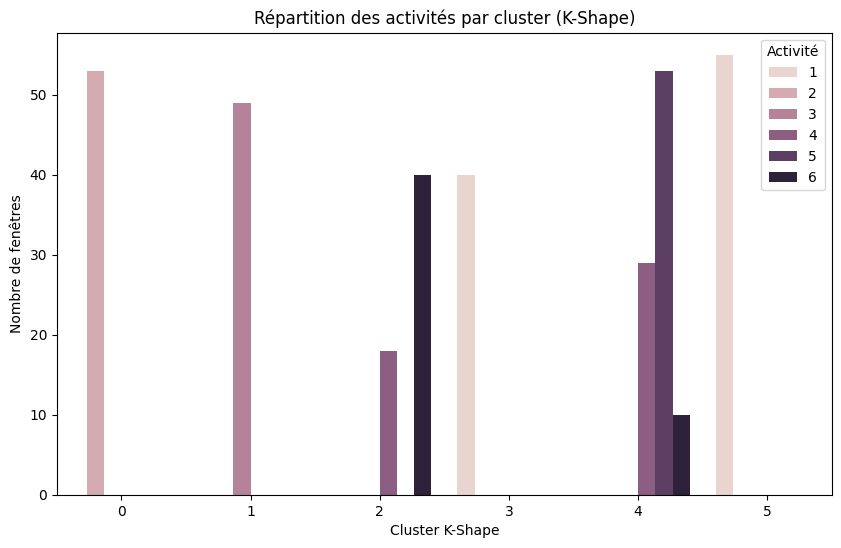

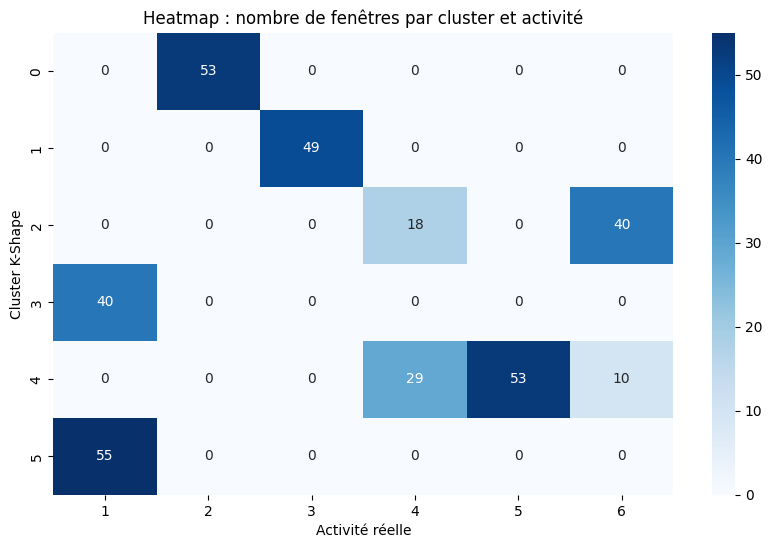

In [4]:
# === K-Shape Clustering ===
# Installer tslearn si ce n'est pas déjà fait : pip install tslearn

from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

# X doit être en 3D : (n_samples, n_timestamps, n_features)
# Ici, chaque "variable" peut être considérée comme une série dans le temps
# On transforme X_scaled pour tslearn
X_ts = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)  # 1 feature

# Normalisation spécifique aux séries temporelles
scaler_ts = TimeSeriesScalerMeanVariance()
X_ts_scaled = scaler_ts.fit_transform(X_ts)

# Clustering K-Shape
kshape = KShape(n_clusters=6, random_state=42)
labels_kshape = kshape.fit_predict(X_ts_scaled)

# Résultats
from sklearn.metrics import adjusted_rand_score
print("\n📊 K-Shape Clustering :")
print("ARI =", adjusted_rand_score(y_true, labels_kshape))
print("Exemple de 10 labels prédits :", labels_kshape[:10])
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Créer un DataFrame cluster / vrai label ===
df = pd.DataFrame({
    'Cluster': labels_kshape,
    'Vrai_Label': y_true
})

# === 2. Tableau de comptage : nombre de fenêtres par cluster et activité ===
count_table = df.groupby(['Cluster', 'Vrai_Label']).size().reset_index(name='Count')
print("\nTableau Cluster / Vrai_Label :")
print(count_table)

# === 3. Diagramme en barre groupée ===
plt.figure(figsize=(10,6))
sns.barplot(x='Cluster', y='Count', hue='Vrai_Label', data=count_table)
plt.title('Répartition des activités par cluster (K-Shape)')
plt.xlabel('Cluster K-Shape')
plt.ylabel('Nombre de fenêtres')
plt.legend(title='Activité')
plt.show()

# === 4. Heatmap ===
pivot_table = df.pivot_table(index='Cluster', columns='Vrai_Label', aggfunc=len, fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap='Blues')
plt.title('Heatmap : nombre de fenêtres par cluster et activité')
plt.xlabel('Activité réelle')
plt.ylabel('Cluster K-Shape')
plt.show()


✅ Shape finale de X : (347, 1152)

📊 DBA-KMeans Clustering :
ARI = 0.8741677539125435
Exemple de 10 labels prédits : [4 4 4 4 4 4 4 4 4 4]

Tableau Cluster / Vrai_Label :
    Cluster  Vrai_Label  Count
0         0           1     95
1         1           4     39
2         1           6      3
3         2           4      7
4         2           6     31
5         3           2     53
6         3           4      1
7         3           6      3
8         4           5     53
9         4           6     13
10        5           3     49


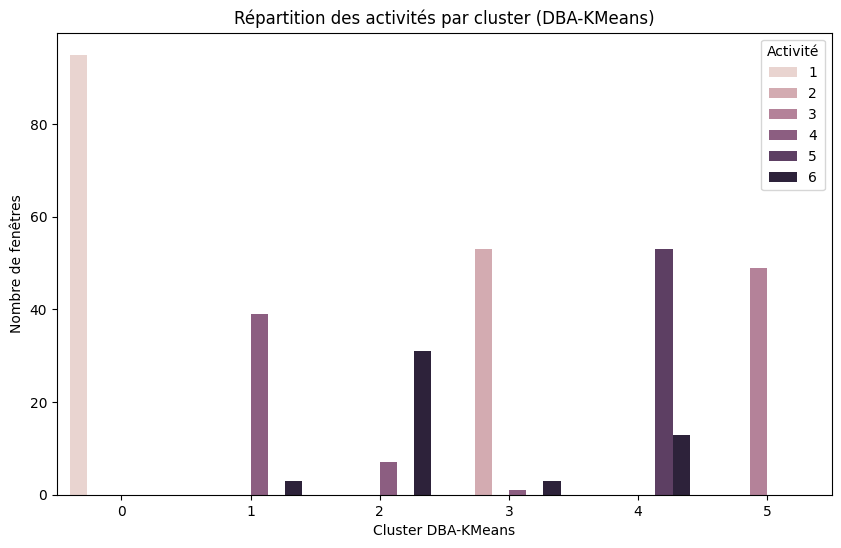

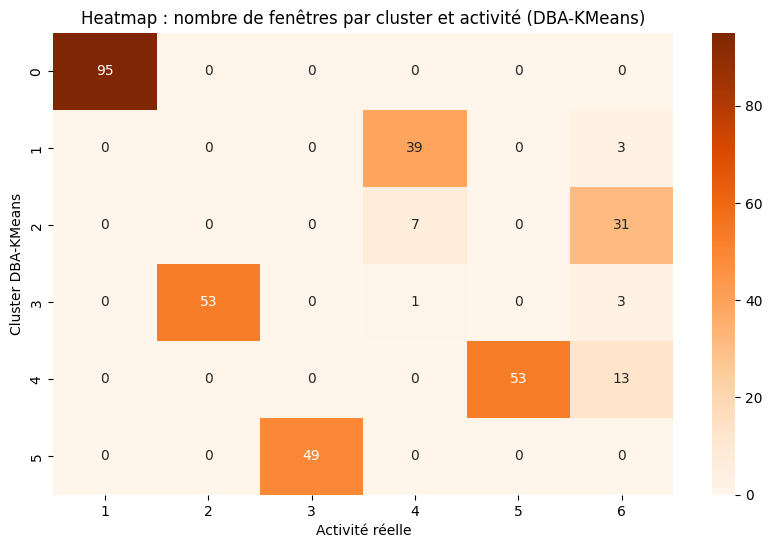

In [5]:
import os
import numpy as np
import pandas as pd
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Dossier contenant les fichiers ===
data_dir = "data_projet/data_projet"

var_files = [
    "acce_x.txt", "acce_y.txt", "acce_z.txt",
    "accm_x.txt", "accm_y.txt", "accm_z.txt",
    "vit_x.txt", "vit_y.txt", "vit_z.txt"
]

# === 2. Lecture et empilement des données ===
data_list = []
for f in var_files:
    path = os.path.join(data_dir, f)
    data = np.loadtxt(path)
    data_list.append(data)

X = np.hstack(data_list)
print("✅ Shape finale de X :", X.shape)

# === 3. Lecture des labels réels ===
lab_path = os.path.join(data_dir, "lab.txt")
y_true = np.loadtxt(lab_path, dtype=int)

# === 4. Normalisation séries temporelles ===
X_ts = X.reshape(X.shape[0], X.shape[1], 1)  # (n_samples, n_timestamps, 1 feature)
scaler_ts = TimeSeriesScalerMeanVariance()
X_ts_scaled = scaler_ts.fit_transform(X_ts)

# === 5. DBA-KMeans (TimeSeriesKMeans avec metric='dtw') ===
dba_kmeans = TimeSeriesKMeans(n_clusters=6, metric="dtw", max_iter=10, random_state=42, n_init=2)
labels_dba = dba_kmeans.fit_predict(X_ts_scaled)

# === 6. ARI ===
ari = adjusted_rand_score(y_true, labels_dba)
print("\n📊 DBA-KMeans Clustering :")
print("ARI =", ari)
print("Exemple de 10 labels prédits :", labels_dba[:10])

# === 7. Tableau cluster / vrai_label ===
df = pd.DataFrame({
    'Cluster': labels_dba,
    'Vrai_Label': y_true
})
count_table = df.groupby(['Cluster', 'Vrai_Label']).size().reset_index(name='Count')
print("\nTableau Cluster / Vrai_Label :")
print(count_table)

# === 8. Diagramme en barre groupée ===
plt.figure(figsize=(10,6))
sns.barplot(x='Cluster', y='Count', hue='Vrai_Label', data=count_table)
plt.title('Répartition des activités par cluster (DBA-KMeans)')
plt.xlabel('Cluster DBA-KMeans')
plt.ylabel('Nombre de fenêtres')
plt.legend(title='Activité')
plt.show()

# === 9. Heatmap ===
pivot_table = df.pivot_table(index='Cluster', columns='Vrai_Label', aggfunc=len, fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap='Oranges')
plt.title('Heatmap : nombre de fenêtres par cluster et activité (DBA-KMeans)')
plt.xlabel('Activité réelle')
plt.ylabel('Cluster DBA-KMeans')
plt.show()
